<a href="https://colab.research.google.com/github/karthikravi123/pytorch_practice/blob/main/Defining_custom_image_dataset_loader_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import DataLoader,Dataset

In [8]:
#!gdown --fuzzy https://drive.google.com/file/d/1G9H2W0R6JLYYBXyHNM_kAcBufUJr4Qsy/view?usp=sharing

In [9]:
!unzip '/content/Classification_dataset_v3.zip'

Archive:  /content/Classification_dataset_v3.zip
   creating: Classification_dataset_v3/
  inflating: Classification_dataset_v3/Dataset_info.txt  
   creating: Classification_dataset_v3/images/
   creating: Classification_dataset_v3/images/test/
   creating: Classification_dataset_v3/images/test/Cat/
  inflating: Classification_dataset_v3/images/test/Cat/cat_1000.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1001.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1002.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1003.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1004.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1005.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1006.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1007.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1008.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1009.jpg 

In [18]:
class ImageDataset(Dataset):
  def __init__(self,image_dir,transform=None):
    self.image_dir = image_dir
    self.image_paths = []
    self.labels = []
    self.class_name = {}
    self.transform = transform

    for label,class_dir in enumerate(os.listdir(image_dir)):
      self.class_name[label] = class_dir
      class_path = os.path.join(image_dir,class_dir)
      for img_name in os.listdir(class_path):
        self.image_paths.append(os.path.join(class_path,img_name))
        self.labels.append(label)

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self, idx):
    img_path = self.image_paths[idx]
    image = Image.open(img_path).convert("RGB")
    label = self.labels[idx]

    if self.transform:
      image = self.transform(image)

    return image,label



we have make it standarized ,we cant during model

we can make standardize while we are creating the data set in batches


using method transformers

transform.compose([
  #pill image resize to 128x128
  transforms.Resize(),
  transforms.ToTensor(),
  ##pytorch expect to tensor image
]
)

we can use this transform on image when our model is asking for data

In [19]:
transform = transforms.Compose([

  transforms.Resize((128,128)),
  transforms.ToTensor()

]
)

In [20]:
train_image_dir = '/content/Classification_dataset_v3/images/train'
test_image_dir = '/content/Classification_dataset_v3/images/test'
train_image_dataset = ImageDataset(image_dir=train_image_dir,transform=transform)
test_image_dataset = ImageDataset(image_dir=test_image_dir,transform=transform)

In [22]:
train_image_loader= DataLoader(dataset=train_image_dataset,batch_size=32,shuffle=True)
test_image_loader= DataLoader(dataset=test_image_dataset,batch_size=32,shuffle=True)

In [24]:
for image,labels in train_image_loader:
  print(image.shape,labels.shape)
  break

torch.Size([32, 3, 128, 128]) torch.Size([32])


In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
train_image_dataset.class_name

{0: 'Cat', 1: 'person', 2: 'Dog'}

In [27]:
test_image_dataset.class_name

{0: 'Cat', 1: 'person', 2: 'Dog'}

torch.Size([32, 3, 128, 128]) torch.Size([32])
person
(128, 128, 3)
1


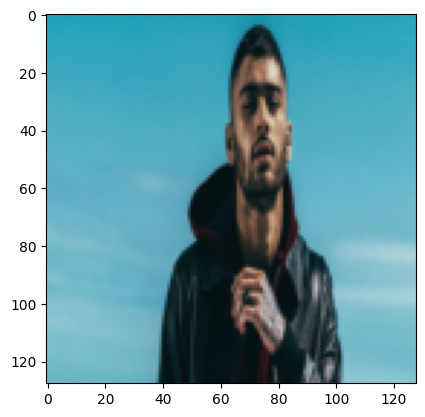

In [31]:
for images,labels in train_image_loader:
  print(images.shape,labels.shape)
  img = images[0].numpy()
  label = labels[0].item()
  print(train_image_dataset.class_name[label])
  img= np.transpose(img,(1,2,0))
  print(img.shape)
  print(label)
  plt.imshow(img,vmin=0,vmax=255)
  break